In [5]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [6]:
data = np.genfromtxt('./Content/advertising.csv', delimiter =',', skip_header =1)
N = data.shape[0]
print(N)
X = data[:, :3]
y = data[:,3:]

200


In [7]:
def mean_normalization(X):
  N = len(X)
  maxi = np.max(X)
  mini = np.min(X)
  avg = np.mean(X)
  X_b = (X - avg) / (maxi - mini)
  X_b = np.hstack([np.ones((N, 1)), X_b])
  return X_b, maxi, mini, avg

X_b, maxi, mini, avg = mean_normalization(X)

In [8]:
def mini_batch_gradient_descent(X_b, y , n_epochs =50 , minibatch_size = 20, learning_rate =0.01):
  thetas = np.array([[1.16270837] ,[ -0.81960489], [1.39501033], [0.29763545]])
  N = data.shape[0]
  thetas_path = [thetas]
  losses = []
  for epoch in range(n_epochs):
    # shuffled_indices = np.random.permutation(N) # uncomment this code for real application
    shuffled_indices = np . asarray ([21 , 144 , 17 , 107 , 37 , 115 , 167 , 31 , 3 ,
132 , 179 , 155 , 36 , 191 , 182 , 170 , 27 , 35 , 162 , 25 , 28 , 73 , 172 , 152 , 102 , 16 ,
185 , 11 , 1 , 34 , 177 , 29 , 96 , 22 , 76 , 196 , 6 , 128 , 114 , 117 , 111 , 43 , 57 , 126 ,
165 , 78 , 151 , 104 , 110 , 53 , 181 , 113 , 173 , 75 , 23 , 161 , 85 , 94 , 18 , 148 , 190 ,
169 , 149 , 79 , 138 , 20 , 108 , 137 , 93 , 192 , 198 , 153 , 4 , 45 , 164 , 26 , 8 , 131 ,
77 , 80 , 130 , 127 , 125 , 61 , 10 , 175 , 143 , 87 , 33 , 50 , 54 , 97 , 9 , 84 , 188 , 139 ,
195 , 72 , 64 , 194 , 44 , 109 , 112 , 60 , 86 , 90 , 140 , 171 , 59 , 199 , 105 , 41 , 147 ,
92 , 52 , 124 , 71 , 197 , 163 , 98 , 189 , 103 , 51 , 39 , 180 , 74 , 145 , 118 , 38 , 47 ,
174 , 100 , 184 , 183 , 160 , 69 , 91 , 82 , 42 , 89 , 81 , 186 , 136 , 63 , 157 , 46 , 67 ,
129 , 120 , 116 , 32 , 19 , 187 , 70 , 141 , 146 , 15 , 58 , 119 , 12 , 95 , 0 , 40 , 83 , 24 ,
168 , 150 , 178 , 49 , 159 , 7 , 193 , 48 , 30 , 14 , 121 , 5 , 142 , 65 , 176 , 101 , 55 ,
133 , 13 , 106 , 66 , 99 , 68 , 135 , 158 , 88 , 62 , 166 , 156 , 2 , 134 , 56 , 123 , 122 ,
154])
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, N, minibatch_size):
      xi = X_b_shuffled[i:i+minibatch_size]
      yi = y_shuffled[i:i+minibatch_size]

      #y_predict
      y_hat = xi.dot(thetas)

      #compute loss
      loss = (y_hat - yi) * (y_hat - yi)/2
      # loss = loss.ravel()


      #compute derivative of loss
      gradient_loss = (y_hat - yi) / minibatch_size

      #compute gradient
      compute_gradient = xi.T.dot(gradient_loss)

      #update thetas
      thetas = thetas - learning_rate * compute_gradient
      thetas_path.append(thetas)

      #add loss
      loss_mean = np.sum(loss)/minibatch_size
      losses.append(loss_mean)
  return thetas_path, losses

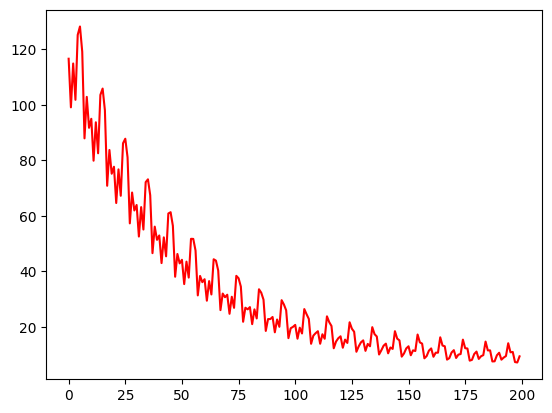

In [9]:
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs = 50, minibatch_size = 20 , learning_rate =0.01)
x_axis = list(range(200))
plt.plot(x_axis, losses[:200], color ="r")
plt.show()

In [10]:
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size = 20, learning_rate =0.01)
print(round(sum(losses), 2))

8865.65
